In [ ]:
!pip install scikit-learn numpy pandas nltk matplotlib seaborn

In [ ]:
import string as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm.notebook import tqdm
tqdm.pandas()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('all')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/profile_based_dataset/df_file.csv"

# Dataset Preprocessing

Our dataset is a text documents collection that contains **2225 text data** and **five categories** of document, these categories are listed like the following:

*   Politics = 0
*   Sport = 1
*   Technology = 2
*   Entertainment =3
*   Business = 4

We will be implementing some necessary preprocessing methods and techniques to normalize our dataset, the process will be the following:

*   Lower-case text
*   Remove punctuations
*   Tokenize the strings
*   Remove extra whitespaces
*   Remove stopwords
*   Lemmatize



In [ ]:
df = pd.read_csv(path)
df.shape

(2225, 2)

In [ ]:
df.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [ ]:
df = df.rename(columns={'Text': 'headline', 'Label': 'category'})
df.head()

,headline,category
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


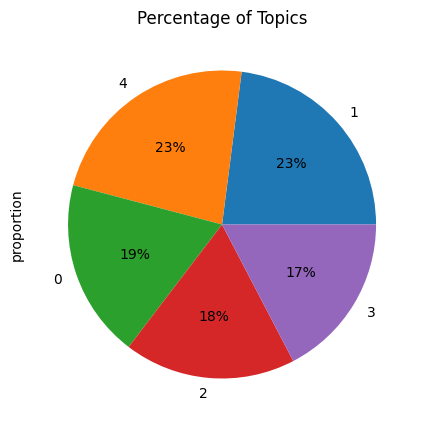

In [ ]:
plot = df['category'].value_counts(normalize=True).plot.pie(autopct='%1.0f%%',
                                                         figsize=(5, 5),
                                                         title='Percentage of Topics')

Politics = 0, Sport = 1, Technology = 2, Entertainment =3, Business = 4

As we can see our dataset is pretty balanced, now we will be normalizing our dataset using the previously mentioned techniques.

In [ ]:
df_clean_text = df.copy()

In [ ]:
import re

def clean_string(string):

    string = re.sub(r"\'s", "", string)
    string = re.sub(r"\'ve", "", string)
    string = re.sub(r"n\'t", "", string)
    string = re.sub(r"\'re", "", string)
    string = re.sub(r"\'d", "", string)
    string = re.sub(r"\'ll", "", string)
    string = re.sub(r",", "", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", "", string)
    string = re.sub(r"'", "", string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"[0-9]\w+|[0-9]", "", string)
    string = re.sub(r"\s{2,}", " ", string)

    return string.strip().lower()

In [ ]:
def remove_punctuation(text):
    return ''.join([ch for ch in text.lower() if ch not in st.punctuation])

df_clean_text['removed_punctuations'] = df_clean_text['headline'].progress_apply(lambda x: remove_punctuation(x))
df_clean_text.head()

  0%|          | 0/2225 [00:00<?, ?it/s]

,headline,category,removed_punctuations
0,Budget to set scene for election\n \n Gordon B...,0,budget to set scene for election\n \n gordon b...
1,Army chiefs in regiments decision\n \n Militar...,0,army chiefs in regiments decision\n \n militar...
2,Howard denies split over ID cards\n \n Michael...,0,howard denies split over id cards\n \n michael...
3,Observers to monitor UK election\n \n Minister...,0,observers to monitor uk election\n \n minister...
4,Kilroy names election seat target\n \n Ex-chat...,0,kilroy names election seat target\n \n exchat ...


In [ ]:
df_clean_text['tokens'] = df_clean_text['removed_punctuations'].progress_apply(lambda x : word_tokenize(x.lower()))

  0%|          | 0/2225 [00:00<?, ?it/s]

In [ ]:
def remove_stop_words(text):
  stopwords = set(nltk.corpus.stopwords.words('english'))
  return [word for word in text if not word in stopwords]

df_clean_text['removed_stop_words'] = df_clean_text['tokens'].progress_apply(lambda x: remove_stop_words(x))

  0%|          | 0/2225 [00:00<?, ?it/s]

In [ ]:
def lemmatize(text):
  word_net = WordNetLemmatizer()
  return [word_net.lemmatize(word) for word in text]

df_clean_text['lemmatized_words'] = df_clean_text['removed_stop_words'].progress_apply(lambda x: lemmatize(x))

  0%|          | 0/2225 [00:00<?, ?it/s]

In [ ]:
def return_clean_text(text):
  sentence = ""
  for word in text:
    sentence += word + " "

  return sentence.strip()

df_clean_text['clean_text'] = df_clean_text['lemmatized_words'].progress_apply(lambda x : return_clean_text(x))
df_clean_text.head()

  0%|          | 0/2225 [00:00<?, ?it/s]

,headline,category,removed_punctuations,tokens,removed_stop_words,lemmatized_words,clean_text
0,Budget to set scene for election\n \n Gordon B...,0,budget to set scene for election\n \n gordon b...,"[budget, to, set, scene, for, election, gordon...","[budget, set, scene, election, gordon, brown, ...","[budget, set, scene, election, gordon, brown, ...",budget set scene election gordon brown seek pu...
1,Army chiefs in regiments decision\n \n Militar...,0,army chiefs in regiments decision\n \n militar...,"[army, chiefs, in, regiments, decision, milita...","[army, chiefs, regiments, decision, military, ...","[army, chief, regiment, decision, military, ch...",army chief regiment decision military chief ex...
2,Howard denies split over ID cards\n \n Michael...,0,howard denies split over id cards\n \n michael...,"[howard, denies, split, over, id, cards, micha...","[howard, denies, split, id, cards, michael, ho...","[howard, denies, split, id, card, michael, how...",howard denies split id card michael howard den...
3,Observers to monitor UK election\n \n Minister...,0,observers to monitor uk election\n \n minister...,"[observers, to, monitor, uk, election, ministe...","[observers, monitor, uk, election, ministers, ...","[observer, monitor, uk, election, minister, in...",observer monitor uk election minister invite i...
4,Kilroy names election seat target\n \n Ex-chat...,0,kilroy names election seat target\n \n exchat ...,"[kilroy, names, election, seat, target, exchat...","[kilroy, names, election, seat, target, exchat...","[kilroy, name, election, seat, target, exchat,...",kilroy name election seat target exchat show h...


In [ ]:
print("Original text: " + df['headline'].iloc[10])
print("New text: " + df_clean_text['clean_text'].iloc[10])

Original text: Hatfield executives go on trial
 
 Engineering firm Balfour Beatty and five railway managers are to go on trial for manslaughter over the Hatfield rail crash in 2000.
 
 Four people died when a section of rail broke and a high speed train derailed. Balfour Beatty's railway maintenance arm was in charge of the upkeep of the line at Hatfield, Hertfordshire. Balfour Beatty managers Anthony Walker and Nicholas Jeffries, and Railtrack managers Alistair Cook, Sean Fugill and Keith Lea all face individual charges. All five men, along with four others, are also accused of breaches of health and safety laws. Balfour Beatty Rail Maintenance faces a corporate manslaughter charge. It is expected the trial could last as long as a year. The accident, on 17 October 2000, happened when the London to Leeds express came off the tracks at 115 mph, when it was derailed by a cracked section of rail. The accident on the East Coast Main Line sparked major disruption. The overall responsibility

# Encoding The Users

Here we created a class to randomly generate users for us with each user having randomly selected topics, with max being 4, and returns a directory of users.

In [ ]:
import random

class UserTopicGenerator:
    def __init__(self, n, topics): # n being the number of users
        self.n = n
        self.topics = topics
        self.users_topics = {}

    def generate_users_topics(self):
        for user_num in range(1, self.n + 1):
            user_topics_count = random.randint(1, 4)  # Randomly choose between 1 to 4 topics
            user_topics = random.sample(self.topics, user_topics_count)
            self.users_topics[f"User #{user_num}"] = user_topics

    def get_users_topics(self):
        return self.users_topics

topics = ["business", "entertainment", "politics", "sport", "tech"]
n = 5

generator = UserTopicGenerator(n, topics)
generator.generate_users_topics()
users_topics_dict = generator.get_users_topics()

users_topics_dict


{'User #1': ['entertainment', 'tech'],
 'User #2': ['tech', 'business'],
 'User #3': ['business', 'sport', 'entertainment', 'tech'],
 'User #4': ['tech', 'business'],
 'User #5': ['politics', 'sport', 'entertainment']}

# GloVe Implementation

In [ ]:
!pip install unzip

In [ ]:
!unzip /content/drive/MyDrive/GloVe/glove.6B.zip

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def load_glove_embeddings(file_path):
  embeddings_index = {}
  with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
      values = line.split()
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word]=coefs

  return embeddings_index

glove_embeddings = load_glove_embeddings('glove.6B.300d.txt')

In [ ]:
def preprocess_text(text):
  tokens = word_tokenize(text.lower())
  return tokens

Compute embeddings for headlines.

In [ ]:
def compute_headline_embeddings(headlines):
  embeddings = []
  for headline in headlines:
      tokens = preprocess_text(headline)
      if tokens:  # Check if there are valid tokens
          """
          Compute average GloVe embedding for the headlines, because it's typically performed on text data such
          as headlines to create a single representation for each headline by capturing the overall semantic meaning
          of the text in a dense vector representation.
          """
          headline_embedding = np.mean([glove_embeddings[token] for token in tokens if token in glove_embeddings], axis=0)
          embeddings.append(headline_embedding)
  return np.array(embeddings)

In [ ]:
headline_embeddings = compute_headline_embeddings(df_clean_text['clean_text'])

print(len(headline_embeddings))

2225


In [ ]:
topics_of_interests = {'politics': ['politics'],
                       'buisness': ['buisness'],
                       'entertainment': ['entertainment'],
                       'sport': ['sport'],
                       'tech': ['tech']}

Compute embeddings for topics.

In [ ]:
def compute_topic_embedding(topics):
  topic_embeddings = {}

  for topic, interests in topics.items():

      interest_embeddings = [glove_embeddings[interest] for interest in interests if interest in glove_embeddings]
      if interest_embeddings:
          topic_embeddings[topic] = np.mean(interest_embeddings, axis=0)
      else:
          topic_embeddings[topic] = None

  return topic_embeddings

topic_embeddings = compute_topic_embedding(topics_of_interests)

In [ ]:
print(topic_embeddings)

And now we compute the cosine similartities.

In [ ]:
def compute_cosine_similarities(headline_embeddings, topic_embeddings):

  topic_headline_scores = {}
  for topic, topic_embedding in topic_embeddings.items():
      similarities = cosine_similarity(topic_embedding.reshape(1, -1), headline_embeddings)
      topic_headline_scores[topic] = similarities.flatten()

  return(topic_headline_scores)

topic_headline_scores = compute_cosine_similarities(headline_embeddings, topic_embeddings)

print(topic_headline_scores)

Now we'll add the similarities to our dataset

In [ ]:
for topic, scores in topic_headline_scores.items():
  df_clean_text[f'similarity_{topic}'] = scores

df_clean_text.head()

,headline,category,removed_punctuations,tokens,removed_stop_words,lemmatized_words,clean_text,similarity_politics,similarity_buisness,similarity_entertainment,similarity_sport,similarity_tech
0,Budget to set scene for election\n \n Gordon B...,0,budget to set scene for election\n \n gordon b...,"[budget, to, set, scene, for, election, gordon...","[budget, set, scene, election, gordon, brown, ...","[budget, set, scene, election, gordon, brown, ...",budget set scene election gordon brown seek pu...,0.446296,-0.321020,0.243660,0.325025,0.268283
1,Army chiefs in regiments decision\n \n Militar...,0,army chiefs in regiments decision\n \n militar...,"[army, chiefs, in, regiments, decision, milita...","[army, chiefs, regiments, decision, military, ...","[army, chief, regiment, decision, military, ch...",army chief regiment decision military chief ex...,0.428958,-0.343431,0.228023,0.336693,0.228679
2,Howard denies split over ID cards\n \n Michael...,0,howard denies split over id cards\n \n michael...,"[howard, denies, split, over, id, cards, micha...","[howard, denies, split, id, cards, michael, ho...","[howard, denies, split, id, card, michael, how...",howard denies split id card michael howard den...,0.449084,-0.333021,0.262023,0.325541,0.284222
3,Observers to monitor UK election\n \n Minister...,0,observers to monitor uk election\n \n minister...,"[observers, to, monitor, uk, election, ministe...","[observers, monitor, uk, election, ministers, ...","[observer, monitor, uk, election, minister, in...",observer monitor uk election minister invite i...,0.469438,-0.309116,0.227446,0.345103,0.231380
4,Kilroy names election seat target\n \n Ex-chat...,0,kilroy names election seat target\n \n exchat ...,"[kilroy, names, election, seat, target, exchat...","[kilroy, names, election, seat, target, exchat...","[kilroy, name, election, seat, target, exchat,...",kilroy name election seat target exchat show h...,0.506915,-0.338288,0.237601,0.341984,0.220845


# ML model Implementations & Evaluations

## Data Preperation: (Train/Validation/Test Split)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X = df_clean_text[['similarity_politics', 'similarity_buisness', 'similarity_entertainment', 'similarity_sport', 'similarity_tech']]
y = df_clean_text['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

## ------------------------------------------------ SVM ------------------------------------------------

In [ ]:
# We use gridsearch for hyperparameter tuning
param_grid = {
    'C': [0.1, 1.1, 0.1],
    'class_weight': ['balanced']
}

svc = SVC(kernel='rbf', gamma='auto')

# svc_with_gs = GridSearchCV(estimator = svc, param_grid=param_grid, cv = 5,
#                            scoring = 'balanced_accuracy', refit=True,
#                            return_train_score = False, n_jobs = -1, verbose=1)

svc_with_gs = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=5,
                           scoring = 'balanced_accuracy', refit=True,
                           return_train_score = False, n_jobs = -1, verbose=1)

svc_with_gs.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1.1, 0.1], 'class_weight': ['balanced']},
             scoring='balanced_accuracy', verbose=1)

### Performance Evaluation


*   Accuracy - **Done**
*   Confusion Matrix - **Done**
*   Precision-Recall curve - **Done**
*   Receiver-Operating-Characteristic (ROC) & Area Under the ROC curve (AUC) - **Done**
*   Mean Average Precision (MAP) - **Done**
*   R-precision - **Done**


#### Validation Score

#### Accuracy


In [ ]:
y_pred_svm = svc_with_gs.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

Accuracy: 0.8539325842696629


#### Confusion Matrix

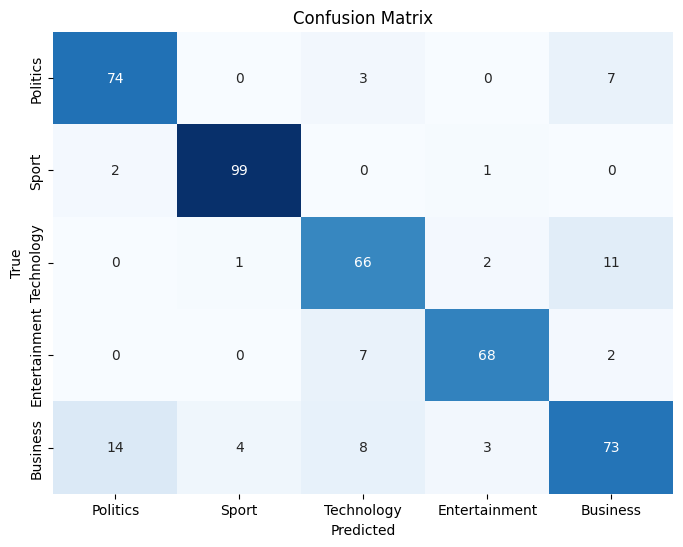

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Politics', 'Sport', 'Technology', 'Entertainment', 'Business'],
            yticklabels=['Politics', 'Sport', 'Technology', 'Entertainment', 'Business'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Precision-Recall curve

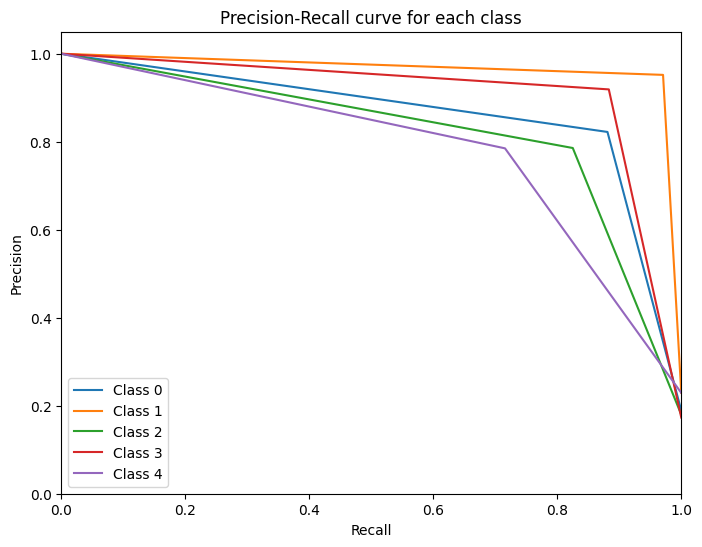

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i in range(5):
    precision, recall, thresholds = precision_recall_curve(y_test == i, y_pred_svm == i)
    average_precision = average_precision_score(y_test == i, y_pred_svm == i)
    plt.plot(recall, precision, label=f'Class {i}'.format(i, average_precision))


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve for each class')
plt.legend(loc='best')
plt.show()

#### ROC & AUC

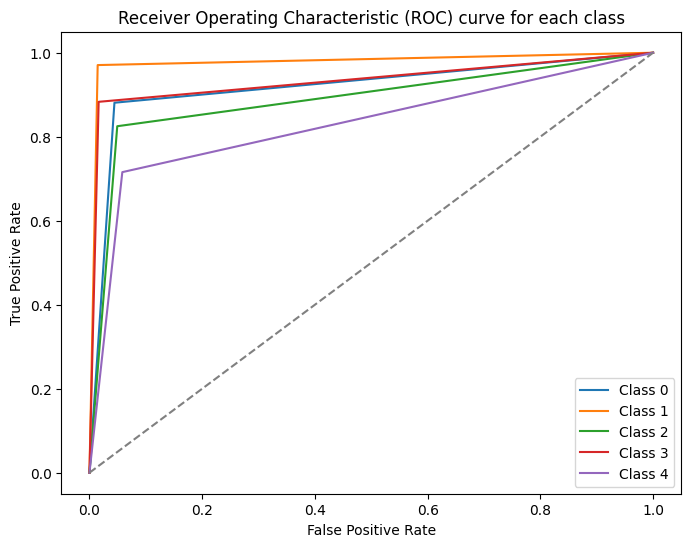

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8, 6))
for i in range(5):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_svm == i)
    auc = roc_auc_score(y_test == i, y_pred_svm == i)
    plt.plot(fpr, tpr, label=f'Class {i}'.format(i, auc))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve for each class')
plt.legend(loc='best')
plt.show()

#### Mean Average Precision

In [ ]:
from sklearn.metrics import average_precision_score

# Calculate Average Precision (AP) for each class
AP = []
for i in range(5):  # Assuming 5 classes
    AP.append(average_precision_score(y_test == i, y_pred_svm == i))

# Calculate Mean Average Precision (MAP)
MAP = sum(AP) / len(AP)
print("Mean Average Precision (MAP):", MAP)

Mean Average Precision (MAP): 0.7631667448792152


#### R-precision

In [ ]:
# Calculate R-precision
R_precision = AP[0]  # Assuming R is the precision at the first rank

print("R-precision:", R_precision)

R-precision: 0.7468105344509839


## ------------------------------------------------ Random Forest ------------------------------------------------

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=1)
model_rf.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.8629213483146068


### Performance Evaluation

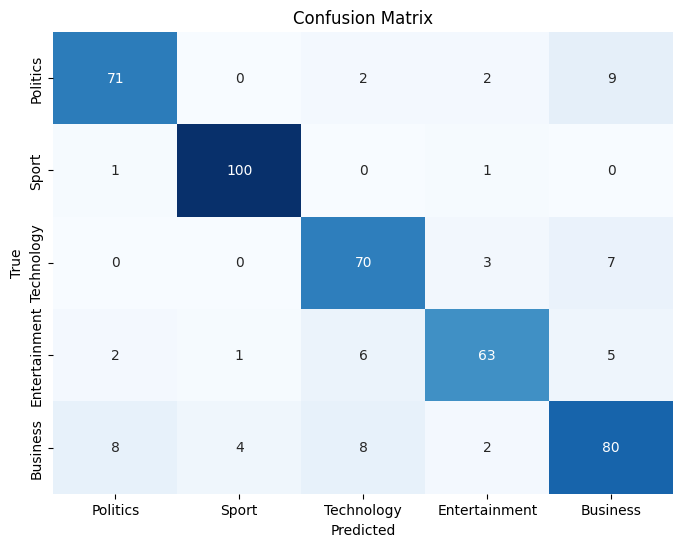

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Politics', 'Sport', 'Technology', 'Entertainment', 'Business'],
            yticklabels=['Politics', 'Sport', 'Technology', 'Entertainment', 'Business'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

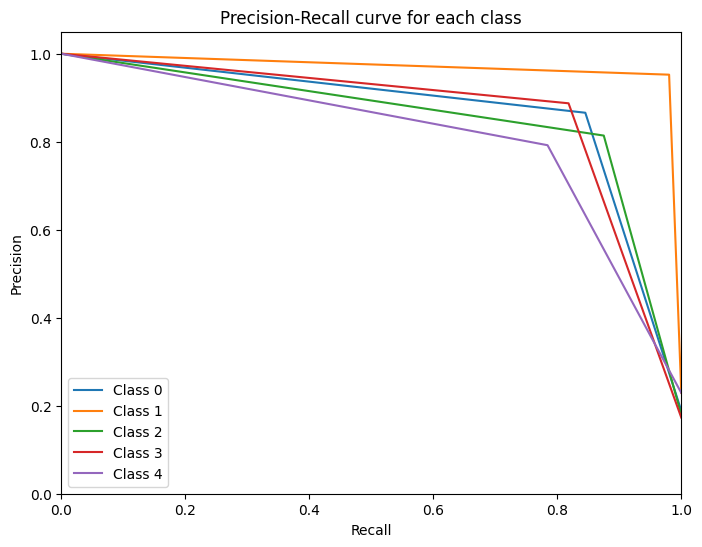

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(5):
    precision, recall, thresholds = precision_recall_curve(y_test == i, y_pred_rf == i)
    average_precision = average_precision_score(y_test == i, y_pred_rf == i)
    plt.plot(recall, precision, label=f'Class {i}'.format(i, average_precision))


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve for each class')
plt.legend(loc='best')
plt.show()

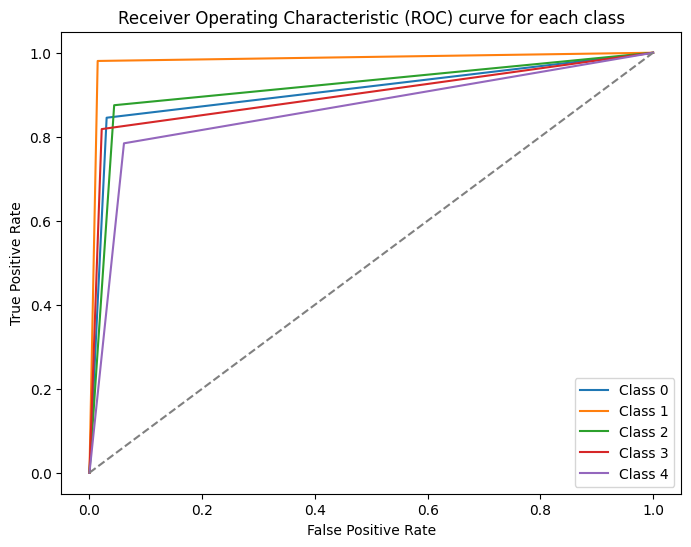

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(5):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_rf == i)
    auc = roc_auc_score(y_test == i, y_pred_rf == i)
    plt.plot(fpr, tpr, label=f'Class {i}'.format(i, auc))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve for each class')
plt.legend(loc='best')
plt.show()

In [ ]:
# Calculate Average Precision (AP) for each class
AP = []
for i in range(5):  # Assuming 5 classes
    AP.append(average_precision_score(y_test == i, y_pred_rf == i))

# Calculate Mean Average Precision (MAP)
MAP = sum(AP) / len(AP)
print("Mean Average Precision (MAP):", MAP)

Mean Average Precision (MAP): 0.772415635831285


In [ ]:
# Calculate R-precision
R_precision = AP[0]  # Assuming R is the precision at the first rank

print("R-precision:", R_precision)

R-precision: 0.761065980242467


# Testing With Users

In [ ]:
users_topics_dict

{'User #1': ['entertainment', 'tech'],
 'User #2': ['tech', 'business'],
 'User #3': ['business', 'sport', 'entertainment', 'tech'],
 'User #4': ['tech', 'business'],
 'User #5': ['politics', 'sport', 'entertainment']}

In [ ]:
def compute_single_headline_embeddings(headline):
  embeddings = []
  tokens = preprocess_text(headline)
  if tokens:  # Check if there are valid tokens
      headline_embedding = np.mean([glove_embeddings[token] for token in tokens if token in glove_embeddings], axis=0)
      embeddings.append(headline_embedding)

  return np.array(embeddings)

In [ ]:
def data_process(data):

  l_data = data.lower()
  removed_punc = remove_punctuation(data)
  tokens = word_tokenize(removed_punc.lower())
  removed_stop_words = remove_stop_words(tokens)
  lemmatized_words = lemmatize(removed_stop_words)
  clean_text_corpus = return_clean_text(lemmatized_words)

  #print(clean_text_corpus)
  corpus_embedding = compute_single_headline_embeddings(clean_text_corpus)
  corpus_similarities = compute_cosine_similarities(corpus_embedding, topic_embeddings)

  df_corpus = pd.DataFrame(corpus_similarities, index=[0])
  df_corpus = df_corpus.rename(columns={'politics': 'similarity_politics', 'buisness': 'similarity_buisness', 'entertainment': 'similarity_entertainment', 'sport': 'similarity_sport', 'tech': 'similarity_tech'})

  return df_corpus

In [ ]:
"""
Example corpus

POLITICS
WASHINGTON — President Trump on Monday ordered new restrictions on asylum seekers at the Mexican border — including application fees and work permit restraints — and directed that cases in the already clogged immigration courts be settled within 180 days. In a memo sent to Kevin McAleenan, the acting secretary of homeland security, and Attorney General William P. Barr, the president took another step to reshape asylum law, which is determined by Congress, from the White House. The restrictions do not take effect immediately. Mr. Trump gave administration officials 90 days to draw up regulations that would carry out his orders. They would be among the first significant changes to asylum policy since Mr. McAleenan replaced Kirstjen Nielsen as head of homeland security and the president signaled he would take a tougher stance on the asylum seekers swamping the border.

ENTERTAINMENT
The countdown is on, with Taylor Swift set to deliver fans her first new music since 2017's reputation album at 2pm today, AEST.vThe country-pop superstar has been teasing today's date across her socials for weeks, and is currently running a live countdown on her Instagram stories that has mere hours to go. And she's just divulged a few more details: The new single's called ME!, it features Panic! At The Disco frontman Brendon Urie, and the music video will drop at the same time as the track today. It marks a tight turnaround for the star, who released the harder-edged reputation album less than 18 months ago. That album was met with the most mixed reviews of Swift's career - but still sold 4.5 million copies worldwide. Swift's always been fond of teasing fans with clues to her new projects, and this time around it came in the form of a giant mural that sprung up on a city wall in Nashville. The mural shows a pair of wings, along with the title of Swift's new single, ME! After a quick call-out on Instagram, Swift today headed to the mural to pose with a horde of excited fans who'd pieced the clues together. "I've never been more proud of your FBI level detective skills," she told the assembled Swifties.

TECH
Following the introduction of Apple’s iOS Screen Time feature, a number of app developers who created screen-tracking and parental control apps have been asked to change their products, or have been booted from the App Store completely, according to a new report in The New York Times. The Times says that “Apple has removed or restricted at least 11 of the 17 most downloaded screen-time and parental-control apps,” as well as a number of others. The report cites users who point out that Apple’s Screen Time app has some drawbacks that the popular third-party apps came with, like the ability to shut down certain apps, less-granular scheduling, and that children were able to work around Apple’s web-filtering tools. They also pointed out that third-party apps could be used across iOS and Android platforms, making it difficult for parents to oversee Android devices. The report features interviews with developers who found their apps pulled from the store abruptly, faced unclear and vague instructions for changes, or unresponsive support from the company. In many cases, the developers note that being booted from the App store can be devastating to their companies — Amir Moussavian the CEO of OurPact, says that 80 percent of its revenue came from the App Store. Apple maintains that the apps violated its rules, that third-party apps could gather too much data on devices, and that the actions weren’t related to the company’s debut of its own screen-monitoring tools. Earlier this week, developers for two apps, Kidslox and Qustodio, filed an antitrust complaint against Apple in the European Union, and last month, Kaspersky Lab filed an antitrust complaint after its own screen-time management app was removed from the store. They aren’t the first to be worried about the company’s reach when it comes to the App Store: Spotify filed an antitrust complaint of its own against Apple, saying that the technology company was giving itself an unfair advantage against third-party music streaming services.

BUSINESS
SAN FRANCISCO — Tesla CEO Elon Musk had prepped Wall Street for a first quarter loss but analysts were still stunned by its size: $702.1 million, among the company’s worst quarters in the past two years. The net loss was more than double what analysts had predicted as Tesla’s sales slumped 31% for the quarter. The loss of $4.10 per share left Musk spending much of a conference call explaining how it happened. But he also extolled his forecast that demand and profit margins will increase as Tesla rolls out updated products and pricing for its three models, and sells more battery storage units. Demand for Tesla’s Models S, X and 3 is returning to normal in the second quarter after the company delivered only 63,000 vehicles from January through March, Musk said. “My impression right now is that demand is quite solid, quite strong,” he said Wednesday. He predicted another loss in the second quarter but said Tesla would be back in the black in the third quarter. The first quarter loss came after two consecutive profitable quarters, the first time that’s happened in Tesla’s 15-year history. The company said that due to “unforeseen challenges” it was only able to deliver half of the vehicles ordered in the quarter by March 31 as it ramped up deliveries in Europe and China. That pushed a large number of deliveries, and revenue, into the current quarter, it said. Tesla’s cash balance at the end of the quarter shrunk by $1.5 billion since December, to $2.2 billion. The company attributed the decline to a $920 million bond payment, and Musk said it might be time for Tesla to raise capital again. Excluding one-time items and stock-based compensation, the company lost $2.90 per share, worse than Wall Street estimates. Analysts polled by FactSet expected a loss of $1.15 per share. Revenue rose almost 40% over a year ago to $3.5 billion. But it still fell short of analyst estimates of $5.42 billion. Despite the less-than-stellar numbers, Tesla’s stock was little changed in extended trading Wednesday following the earnings report. The company said one-time items cost it $188 million during the quarter, including a loss for predicted increases in return rates for cars that had been sold under Tesla’s used car price and buy back guarantee programs. Tesla has guaranteed the value of the cars after certain time periods and will buy them back for a guaranteed price. The company still expects to produce 360,000 to 400,000 vehicles this year, and if a new Chinese factory hits volume production at the end of the year, it could make 500,000. Tesla likely is nearing its “cash floor,” the amount it needs in the checking account to pay all the bills, said Gartner analyst Michael Ramsey. “It’s anxiety provoking,” Ramsey said. If Tesla continues burning cash at the first quarter rate, it would run out of money in less than six months. But Ramsey said that’s not likely. If Tesla can produce and sell all the vehicles that it predicts in the current quarter, it will generate a lot of cash, easing its problem. Tesla said it believes deliveries will hit 90,000 to 100,000 vehicles from April through June. Tesla, Ramsey said, has many supporters and shouldn’t have trouble borrowing money or issuing more stock to generate cash. The fact that Musk said it may be time to raise capital means “you can pretty much count on it,” Ramsey said. Musk also told analysts that the company has become more efficient as it tries to save cash. “I think it’s healthy to be on a Spartan diet for a while,” he said. Chief Financial Officer Zachary Kirkhorn, meanwhile, hinted on the conference call that Tesla will build its new semi starting next year at its factory near Reno, Nevada. That’s where the battery and electric drive units will be made, he said. And Musk said the company will decide in the next few weeks whether it will build the Model Y small SUV in Nevada or at its Fremont, California, factory. Deliveries are scheduled to start in the fall of 2020. Musk also said Wednesday that average prices for the Model 3 mass-market car are running around $50,000, with very few taking the $35,000 version. Another problem for Tesla is fading sales of its higher-priced models S and X as the vehicles age. But Tuesday night, the company announced updates to both, including a new drive system that increases the range by 10% per electric charge. Long-range versions of the S will be able to go 370 miles per charge, for example. The vehicles also will get new suspensions, faster acceleration and more comfortable rides, Tesla said. Profit margins on the S and X, which can run well over $100,000, should rise because the improvements actually save the company money, Musk said. Tesla has lost more than $6 billion since setting out to revolutionize the auto industry 15 years ago, but Musk foresees a profitable future fueled in part by a ride-hailing service made up of electric cars driven by robots. Musk believes Tesla’s technology is capable of letting the vehicles drive themselves. That terrifies some critics who worry Musk’s plan to transport passengers in self-driving Teslas without a human to take control in emergencies will maim and kill people.

SPORT
Leading Premier League players on Thursday have backed the Professional Footballers' Association's (PFA) campaign to boycott social media for 24 hours in a stand against racism. The PFA has urged professional players in England and Wales to post a #Enough graphic on their social media platforms before the boycott begins at 0800 GMT on Friday. The campaign is an attempt to increase the pressure on social media companies and the sport's governing bodies to take stronger action when responding to racist abuse, the PFA said in a statement. Tottenham Hotspur and England defender Danny Rose said: "I don't want any future players to go through what I’ve been through in my career. "Collectively, we are simply not willing to stand-by while too little is done by football authorities and social media companies to protect players from this disgusting abuse. Manchester United defender Chris Smalling also backed the campaign, just days after his team mate Ashley Young was racially abused on Twitter following his side's Champions League exit in Barcelona. "Throughout my career I have developed a thick skin against verbal abuse, justifying it as just 'part of the game' but the time has come for Twitter, Instagram and Facebook to consider regulating their channels," Smalling said. Watford captain Troy Deeney, who disabled comments on his Instagram after abuse earlier this month, said: "On Friday we are sending a message to anyone that abuses players - or anyone else - whether from the crowd or online, that we won't tolerate it within football. "The boycott is just one small step, but the players are speaking out with one voice against racism." The PFA said the boycott was the "first step in a longer campaign to tackle racism in football".
"""

print(f'These are the users at hand:\n')
for user, topics in users_topics_dict.items():
    print(f"{user}: {topics}\n")

while True:

  try:
    test_corpus = input("Paste here an article without newline character (Press 'q' to quit or 'c' to continue):\n")
  except ValueError:
    continue
  if test_corpus == 'q':
     break
  if test_corpus == 'c':
    print(f'These are the users at hand:')
    for user, topics in users_topics_dict.items():
      print(f"{user}: {topics}\n")
    continue
  else:
    print("\n--------------------- With Random Forest---------------------\n")
    result = model_rf.predict(data_process(test_corpus))


    # Politics = 0, Sport = 1, Technology = 2, Entertainment =3, Business = 4

    if(result == 0):
      result = 'politics'
      print(result)
      topic = result
    if(result == 1):
      result = 'sport'
      print(result)
      topic = result
    if(result == 2):
      result = 'tech'
      print(result)
      topic = result
    if(result == 3):
      result = 'entertainment'
      print(result)
      topic = result
    if(result == 4):
      result = 'buisness'
      print(result)
      topic = result

    print(f'This article talks about {topic} and the users concerned would be: \n')

    users_with_topic = [user for user, topics in users_topics_dict.items() if topic in topics]

    print(f"Users interested in '{topic}': {users_with_topic}\n")

  continue

These are the users at hand:

User #1: ['entertainment', 'tech']

User #2: ['tech', 'business']

User #3: ['business', 'sport', 'entertainment', 'tech']

User #4: ['tech', 'business']

User #5: ['politics', 'sport', 'entertainment']

Paste here an article without newline character (Press 'q' to quit or 'c' to continue):
Following the introduction of Apple’s iOS Screen Time feature, a number of app developers who created screen-tracking and parental control apps have been asked to change their products, or have been booted from the App Store completely, according to a new report in The New York Times. The Times says that “Apple has removed or restricted at least 11 of the 17 most downloaded screen-time and parental-control apps,” as well as a number of others. The report cites users who point out that Apple’s Screen Time app has some drawbacks that the popular third-party apps came with, like the ability to shut down certain apps, less-granular scheduling, and that children were able to